<a href="https://colab.research.google.com/github/sagarkr666/yolov3-on-coustom-data/blob/main/SOSYOLOv3_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository,



In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15283, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 15283 (delta 40), reused 50 (delta 26), pack-reused 15186
Receiving objects: 100% (15283/15283), 13.78 MiB | 16.86 MiB/s, done.
Resolving deltas: 100% (10351/10351), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [5]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## Downloading pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and then we will design our own coustom yolov3 model.

In [6]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-07-19 11:19:24--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  22.6MB/s    in 11s     

2021-07-19 11:19:36 (21.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [30]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

## Run Detections with Darknet and YOLOv3!
Darknet is now built and ready to run detections using YOLOv3.we can see the classes on which coco data contains.COCO CLASSES- (http://cocodataset.org/)



Darknet contains few images already installed in the darknet/data/ folder.



Following command is used to run the object detector using darknet-

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

for getting output image this command is used-
imShow('predictions.jpg')


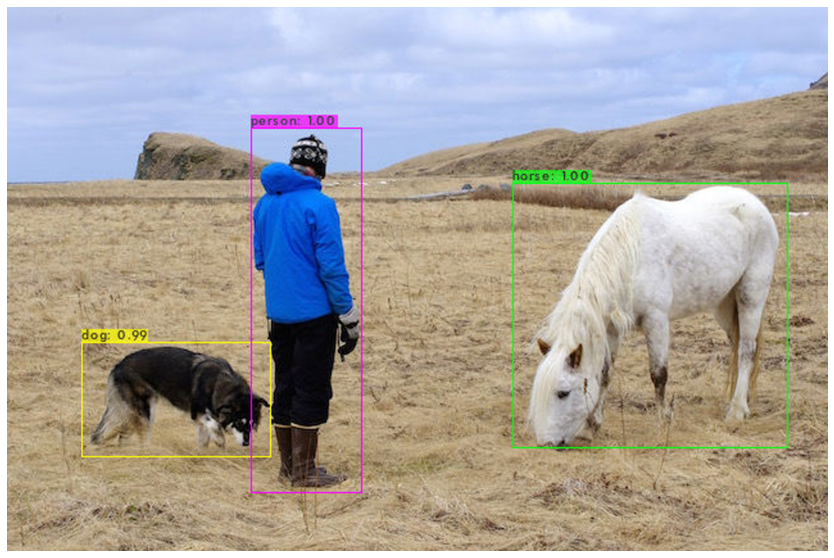

In [ ]:
# show image using imshow function
imShow('predictions.jpg')

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

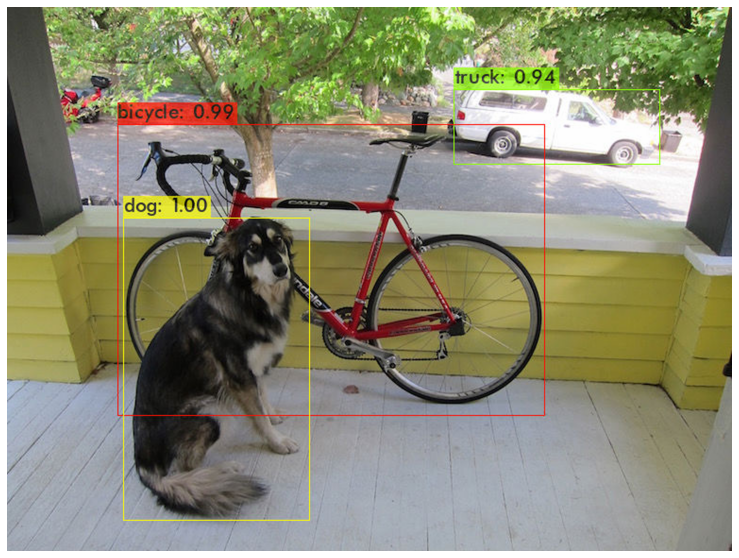

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

###  Taking images form Google Drive for testing
Images can also be uploaded from your Google Drive and easily have detections run on them.



Below command is for mounting our google drive into the cloud VM so that we can access its contents.


In [8]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


below code means we are just creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'.

In [9]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 2015605781_caste.jpg
 2015605781_income.jpg
 2015605781_pb_scan1.jpg
 2015605781_residence.jpg
 2015605781_stud.jpg
'clg fee slip - Copy.jpg'
'Colab Notebooks'
 Documents
'Getting started.pdf'
'idc-nzyz-cuf - Jul 10, 2021.gjam'
 img026.jpg
 img027.jpg
 img028.jpg
 img047.jpg
 img048.jpg
 img071.jpg
 img072.jpg
 img073.jpg
 img175.jpg
 IMG_20160717_153559.jpg
 IMG_20161231_141638.jpg
 IMG_20161231_141644.jpg
 IMG_20161231_141655.jpg
 IMG_20161231_141713.jpg
 IMG_20161231_141923.jpg
 IMG_20161231_142000.jpg
 IMG_20161231_142004.jpg
 IMG_20170101_035346_6.jpg
 IMG_20170101_035407_4.jpg
 IMG_20170101_040131.jpg
 IMG_20170101_040201.jpg
 IMG_20170101_040211.jpg
 IMG_20170101_040226.jpg
 IMG_20170101_040230.jpg
 IMG_20170101_040311.jpg
 IMG_20170101_040315.jpg
 IMG_20170101_041402_7.jpg
 IMG_20170101_041602.jpg
 IMG_20170101_041605.jpg
 IMG_20170101_041609.jpg
 IMG_20170101_041612.jpg
 IMG_20170101_041619.jpg
 IMG_20170101_041620.jpg
 IMG_20170101_041634.jpg
 IMG_20170101_041636.jpg
 IMG_20

/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Sho

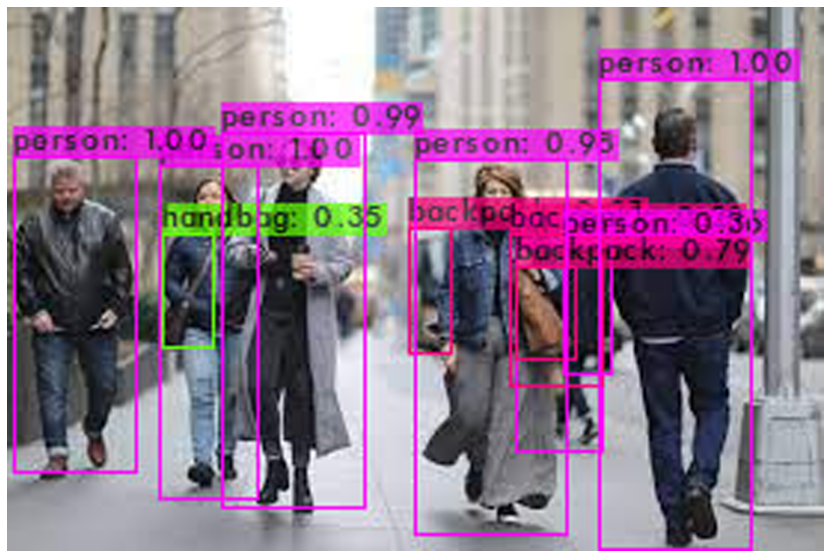

In [ ]:
# runing darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/yolo/1.jpg
imShow('predictions.jpg')

## To get output image saved in our google drive
A simple copy command can copy over any file to your Google Drive as it is already mounted. 

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/yolo/prediction2.jpg

# Training our own Custom YOLOv3 Object Detector
in order to train our model in our coustom data set we have taken human head data from "open image dataset v6" contains 600 object classes


In order to create our custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file 


Firstly i have downloaded my dataset on which i want to train my model.I have taken human head images for traing my own coustom model and prepared my dataset in proper format to be used for training.

# Moving our Custom Dataset Into Cloud VM
Firstly i have my traing data with labels in proper format to train now i have renamed it as obj file and zipped it because it will take less time to upload on google drive.
Then i have unzipped the data in our cloud VM.
Now we can copy in the zip and unzip it on our cloud VM.

In [60]:
# this is where my zip is stored (I created a yolo folder where I will get my required files from)
!ls /mydrive/yolo/obj.zip

/mydrive/yolo/obj.zip


In [61]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolo/obj.zip ../

In [62]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/Humans/00006c07d2b033d1.jpg  
  inflating: data/Humans/00006c07d2b033d1.txt  
  inflating: data/Humans/0110d0519a1f0966.jpg  
  inflating: data/Humans/0110d0519a1f0966.txt  
  inflating: data/Humans/0175f67db368190a.jpg  
  inflating: data/Humans/0175f67db368190a.txt  
  inflating: data/Humans/01cac94ee478b890.jpg  
  inflating: data/Humans/01cac94ee478b890.txt  
  inflating: data/Humans/029ab3b416580d7c.jpg  
  inflating: data/Humans/029ab3b416580d7c.txt  
  inflating: data/Humans/02d7bf4b200e0580.jpg  
  inflating: data/Humans/02d7bf4b200e0580.txt  
  inflating: data/Humans/03092e96489539ba.jpg  
  inflating: data/Humans/03092e96489539ba.txt  
  inflating: data/Humans/0311ef589ca1c4a2.jpg  
  inflating: data/Humans/0311ef589ca1c4a2.txt  
  inflating: data/Humans/033555bda1a98252.jpg  
  inflating: data/Humans/033555bda1a98252.txt  
  inflating: data/Humans/036d991d2f791d60.jpg  
  inflating: data/Humans/036d991d2f791d60.txt  
  inflating: data/H

# Configuring files for training
This step involves properly configuring our custom .cfg file, obj.data, obj.names and train.txt file.




## Cfg File
Copy over the yolov3.cfg from darknet to edit by below code.

In [ ]:
# download cfg to google drive and change its name
!cp /content/darknet/cfg/yolov3.cfg /mydrive/yolo/yolo_new.cfg

## Uploding our own coustom cfg from drive to cloud VM.
After making our own coustom cfg file by making changes accouding to our own aim in the origional cfg flie of darknet yolov3.cfg.
Now it is uploded

In [64]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolo/yolov3_custom.cfg /content/darknet/cfg/yolov3_custom_sagar.cfg

#upload the custom .cfg back to cloud VM from local machine (uncomment to use)
# %cd cfg
# upload()
# %cd .. 

##  obj.names and obj.data 
Created a new file within a code or text editor called **obj.names** and we will make this file exactly the same as our classes.txt as our own classes contains in the dataset.
we have to also created a **obj.data** file and fill it in like this (change our number of classes accordingly, as well as our backup location)

This backup path is where we will save the weights to of our model throughout training. First we should have any floder where we want to save the backup weights i have created a backup folder in my drive and haved given the path of backup file int the obj.data file.

In [65]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolo/obj.names /content/darknet/data
!cp /mydrive/yolo/obj.data  /content/darknet/data

 

## Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.

I have created a script to generates train.txt for my task.

The script can be accessed from my same repo

Just download the file to your local machine or Google drive so we can upload it to your cloud VM.

In [78]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/yolo/generate_train.py ./

Now we simply run the python script to do all the work for us.

In [79]:
!python generate_train.py

In [80]:
# verify train.txt can be seen in our darknet/data folder
!ls /content/darknet/data

9k.tree     eagle.jpg	 Humans			   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.labels.list	   obj.names	     train.txt
coco.names  goal.txt	 imagenet.shortnames.list  openimages.names  voc.names
dog.jpg     horses.jpg	 labels			   person.jpg


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
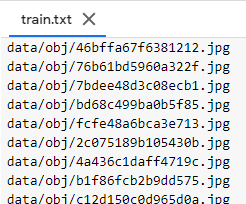

It will contain one line for each training image path.

# Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps our custom object detector to be way more accurate and not have to train as long. we don't have to use these weights but it will help our modle converge and be accurate way faster. 

In [25]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-07-19 11:34:40--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.1MB/s    in 7.5s    

2021-07-19 11:34:48 (20.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Finally Train our Coustom Object detector
We are now ready to train your custom YOLOv3 object detector on whatever crazy classes we have decided on. So run the following command.

In [ ]:
# train your custom detector
! ./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 394706, rewritten_bbox = 0.358495 % 

 1926: 0.673435, 0.616200 avg loss, 0.000010 rate, 10.172533 seconds, 123264 images, 0.295422 hours left
Loaded: 0.000086 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.775644), count: 5, class_loss = 0.073328, iou_loss = 0.238829, total_loss = 0.312158 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.889858), count: 1, class_loss = 0.108596, iou_loss = 0.007803, total_loss = 0.116399 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.002325, iou_loss = 0.000000, total_loss = 0.002325 
 total_bbox = 394712, rewritten_bbox = 0.358489 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.902198), count: 4, class_loss = 0.027536, iou_loss = 0.094566, total_loss = 0.122101 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 

You can observe a chart of how our model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For our model to be 'accurate' you would aim for a loss under 2.

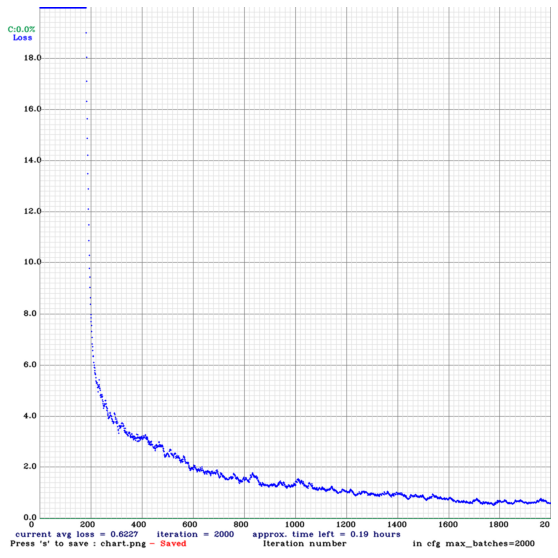

In [ ]:
imShow('chart.png')

## Now we are loading weights to darknet framework
Weights Learnt my our model and after training it got saved in my google drive where i had created a backup file now i will load the final weight learnt by my ouw coustom data.

In [82]:
%cd darknet
!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_sagar.cfg /mydrive/yolo/backup/yolov3_custom_final.weights -dont_show

[Errno 20] Not a directory: 'darknet'
/content/darknet
 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom_sagar
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3

#  Testing our Custom Object Detector
Now we will test our own coustom detector

In [83]:
# need to set our custom cfg to test mode 
%cd /content/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom_sagar.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom_sagar.cfg
%cd ..


/content/darknet/cfg
/content/darknet


Here in below cammond we can set our own threshold accourdingly.

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

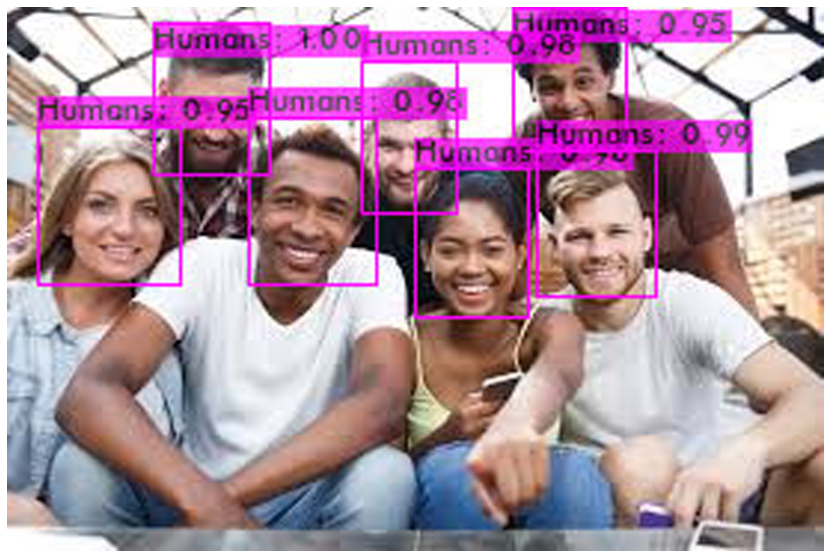

In [114]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3_custom_sagar.cfg /mydrive/yolo/backup/yolov3_custom_final.weights /mydrive/yolo/test/x6.jpg -thresh 0.3
imShow('predictions.jpg')

In [116]:
# GOOGLE DRIVE DOWNLOAD
# this is just to save our prediction in our own g drive
!cp predictions.jpg /mydrive/yolo/test/testx6.jpg